#Importing the Dependancies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Data Processing

In [2]:
insurance_data = pd.read_csv("/content/insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

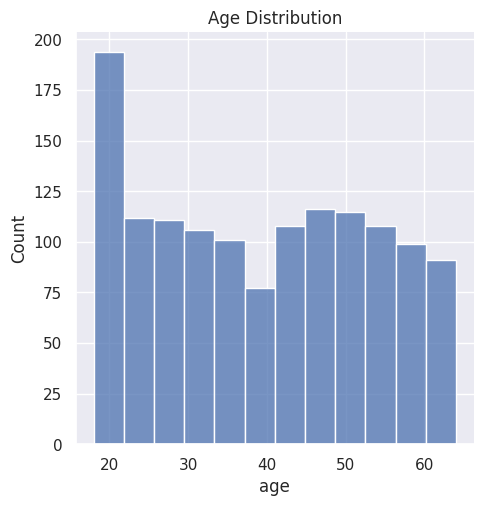

In [10]:
#distribution of age value

sns.set()
plt.figure(figsize = (8, 8),)
sns.displot(insurance_data["age"])
plt.title("Age Distribution")
plt.show()

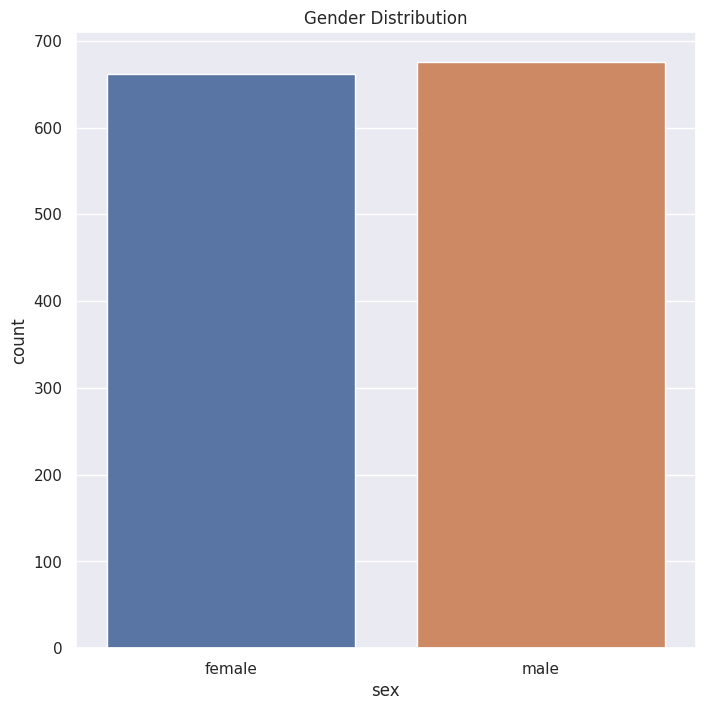

In [14]:
# Gender Distribution

plt.figure(figsize = (8, 8),)
sns.countplot(x ='sex', data = insurance_data)
plt.title("Gender Distribution")
plt.show()

In [16]:
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
#We can also check BMI distribution the same way as age
#We can also check children count the same way as sex

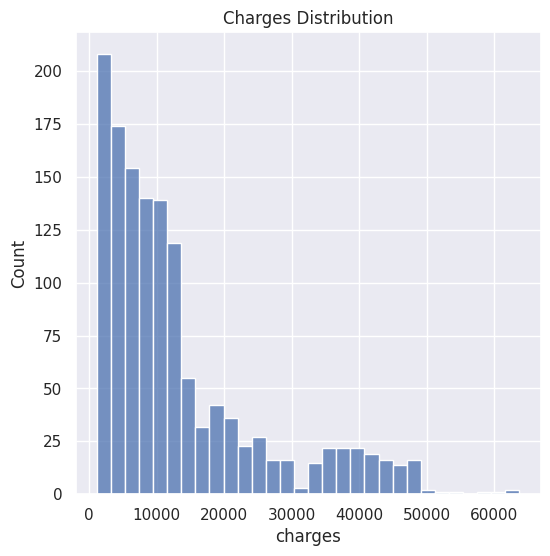

In [20]:
#Distribution of charges

plt.figure(figsize = (6,6))
sns.histplot(insurance_data["charges"])
plt.title("Charges Distribution")
plt.show()

In [24]:
#Encoding sex column

insurance_data.replace({"sex": {'male' : 0, "female" : 1}}, inplace = True)

In [25]:
insurance_data.replace({"smoker": {'no' : 0, "yes" : 1}}, inplace = True)

In [31]:
insurance_data.replace({"region": {'southwest' : 0,
                                   "southeast" : 1,
                                   "northwest" : 2,
                                   "northeast" : 3}}, inplace = True)

#Model Training

In [32]:
X = insurance_data.drop(columns = "charges", axis =1)
Y = insurance_data["charges"]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                    test_size = 0.2,
                                    random_state = 2)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation

In [36]:
train_pred = model.predict(X_train)
r2_value = metrics.r2_score(Y_train, train_pred)
print("The R2 Score for training Data is: ", r2_value)

The R2 Score for training Data is:  0.7519923667088932


In [37]:
test_pred = model.predict(X_test)
r2_value_test = metrics.r2_score(Y_test, test_pred)
print("The R2 Score for testing Data is: ", r2_value_test)

The R2 Score for testing Data is:  0.7445422986536503
